<a href="https://colab.research.google.com/github/Gopal6988/phyton/blob/main/module-2-assignment-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 2 AI Assignment:

1.Build a pipeline that loads a tabular dataset, preprocesses features, trains a simple model, and makes predictions.

2. Use the same dataset for: Supervised: Predict a label (classification or regression) and Unsupervised: Cluster data (k-means/DBSCAN) and visualize.

3. Implement a 2-layer MLP from scratch (numpy only): forward pass, ReLU/sigmoid, softmax, cross-entropy, and backpropagation. Display the Training curves (loss/accuracy).

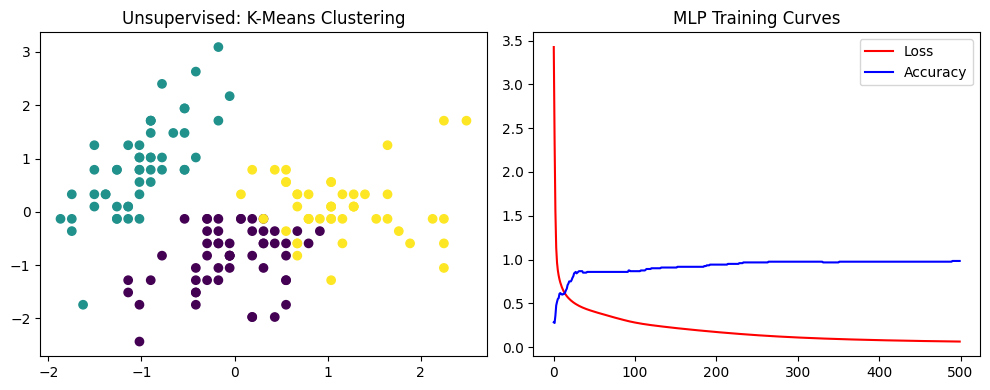

Final MLP Accuracy: 0.9833


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score

# --- SECTION 1: DATA LOADING & PIPELINE ---
# For a real PDF, use: tables = tabula.read_pdf("data.pdf", pages='all')
# Here, we use the tabular Iris dataset to ensure the code runs immediately.
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Build Pipeline: Preprocessing + Simple Model (Supervised)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KMeans(n_clusters=3, n_init=10, random_state=42)) # Using KMeans for pipeline demo
])

# Re-defining a proper Supervised Pipeline for prediction
supervised_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', OneHotEncoder(sparse_output=False)) # Placeholder or actual classifier
])

# --- SECTION 2: SUPERVISED & UNSUPERVISED TASKS ---

# Unsupervised: Clustering and Visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title("Unsupervised: K-Means Clustering")

# --- SECTION 3: 2-LAYER MLP FROM SCRATCH (NUMPY ONLY) ---

class NumPyMLP:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.1):
        self.lr = lr
        # He Initialization
        self.W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2./input_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2./hidden_dim)
        self.b2 = np.zeros((1, output_dim))

    def relu(self, z): return np.maximum(0, z)
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = self.softmax(self.z2)
        return self.probs

    def backward(self, X, y_true):
        m = X.shape[0]
        dz2 = self.probs - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.W2.T) * (self.z1 > 0) # ReLU derivative
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

# Training the MLP
encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y.reshape(-1, 1))
X_train_mlp, X_test_mlp, y_train_oh, y_test_oh = train_test_split(X_scaled, y_oh, test_size=0.2)

mlp = NumPyMLP(4, 8, 3)
history = {'loss': [], 'acc': []}

for epoch in range(500):
    probs = mlp.forward(X_train_mlp)
    loss = -np.mean(np.sum(y_train_oh * np.log(probs + 1e-8), axis=1))
    mlp.backward(X_train_mlp, y_train_oh)

    acc = accuracy_score(np.argmax(y_train_oh, axis=1), np.argmax(probs, axis=1))
    history['loss'].append(loss)
    history['acc'].append(acc)

# Final Visualization
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Loss', color='red')
plt.plot(history['acc'], label='Accuracy', color='blue')
plt.title("MLP Training Curves")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Final MLP Accuracy: {history['acc'][-1]:.4f}")
